In [1]:
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
import cv2 as cv 
from tqdm import tqdm 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
paths = []
import os
for dirname, _, filenames in os.walk(r'chest_xray'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))


In [3]:
paths[:5]

['chest_xray\\.DS_Store',
 'chest_xray\\test\\.DS_Store',
 'chest_xray\\test\\NORMAL\\IM-0001-0001.jpeg',
 'chest_xray\\test\\NORMAL\\IM-0003-0001.jpeg',
 'chest_xray\\test\\NORMAL\\IM-0005-0001.jpeg']

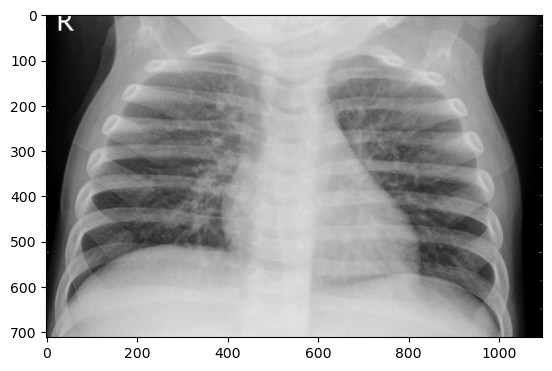

In [4]:
temp = cv.imread(paths[500])
plt.imshow(temp)

In [5]:
normal = []
pneumonia = []
for img in paths:
    if ".DS_Store" in img:
        pass
    elif "NORMAL" in img:
        normal.append(img)
    else:
        pneumonia.append(img)

In [6]:
print("normal",len(normal),"pneumonia",len(pneumonia)),print("Total",len(normal)+len(pneumonia))

normal 1583 pneumonia 4273
Total 5856


(None, None)

In [7]:
pneumonia[:10]

['chest_xray\\test\\PNEUMONIA\\person100_bacteria_475.jpeg',
 'chest_xray\\test\\PNEUMONIA\\person100_bacteria_477.jpeg',
 'chest_xray\\test\\PNEUMONIA\\person100_bacteria_478.jpeg',
 'chest_xray\\test\\PNEUMONIA\\person100_bacteria_479.jpeg',
 'chest_xray\\test\\PNEUMONIA\\person100_bacteria_480.jpeg',
 'chest_xray\\test\\PNEUMONIA\\person100_bacteria_481.jpeg',
 'chest_xray\\test\\PNEUMONIA\\person100_bacteria_482.jpeg',
 'chest_xray\\test\\PNEUMONIA\\person101_bacteria_483.jpeg',
 'chest_xray\\test\\PNEUMONIA\\person101_bacteria_484.jpeg',
 'chest_xray\\test\\PNEUMONIA\\person101_bacteria_485.jpeg']

In [8]:
bacteria = []
virus = []
for i in pneumonia:
    if "bacteria" in i:
        bacteria.append(i)
    else:
        virus.append(i)

In [9]:
len(normal),len(bacteria),len(virus),len(normal)+len(bacteria)+len(virus)

(1583, 2780, 1493, 5856)

In [15]:
def Preprocessor(data):
    temp = []
    for img in data:
        img = cv.imread(img)
        if type(img) == np.ndarray:
            img1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
            img2 = cv.blur(img1,(3,3))
            temp.append(cv.resize(img2,(224,224)))
    return temp

In [17]:
noraml_reshaped = Preprocessor(normal)
bacteria_reshaped = Preprocessor(bacteria)
virus_reshaped = Preprocessor(virus)

Text(0.5, 1.0, 'virus')

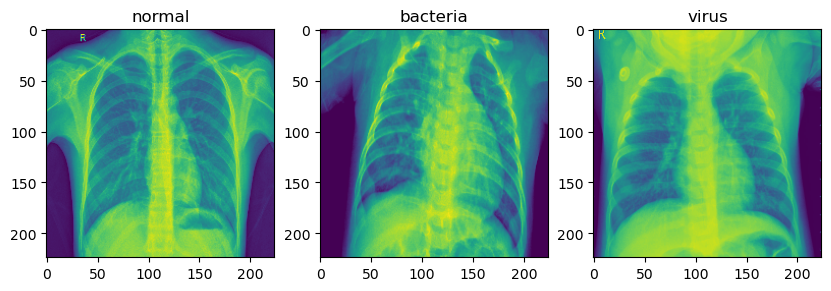

In [18]:
plt.figure(figsize=(10,9))
plt.subplot(1,3,1)
plt.imshow(noraml_reshaped[12])
plt.title("normal")
plt.subplot(1,3,2)
plt.imshow(bacteria_reshaped[90])
plt.title("bacteria")
plt.subplot(1,3,3)
plt.imshow(virus_reshaped[4])
plt.title("virus")

In [20]:
normal_train = noraml_reshaped[:int((80/100)*len(noraml_reshaped))]
bacteria_train = bacteria_reshaped[:int((80/100)*len(bacteria_reshaped))]
virus_train = virus_reshaped[:int((80/100)*len(virus_reshaped))]
y_train = [1]*len(normal_train) + [0]*len(bacteria_train) + [2]*len(virus_train)


In [21]:
normal_test = noraml_reshaped[int((80/100)*len(noraml_reshaped)):]
bacteria_test = bacteria_reshaped[int((80/100)*len(bacteria_reshaped)):]
virus_test = virus_reshaped[int((80/100)*len(virus_reshaped)):]
y_test = [1]*len(normal_test) + [0]*len(bacteria_test) + [2]*len(virus_test)

In [22]:
normal_scaled = np.array(normal_train)/255
bacteria_scaled = np.array(bacteria_train)/255
virus_scaled = np.array(virus_train)/255



In [25]:
normal_scaled_test = np.array(normal_test)/255
bacteria_scaled_test = np.array(bacteria_test)/255
virus_scaled_test = np.array(virus_test)/255

In [26]:
X_train = np.array(list(normal_scaled) + list(bacteria_scaled) + list(virus_scaled))
X_test = np.array(list(normal_scaled_test) + list(bacteria_scaled_test) + list(virus_scaled_test))
len(X_train),len(y_train),len(X_test),len(y_test)

(4684, 4684, 1172, 1172)

In [27]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
X_train.shape,X_test.shape

((4684, 224, 224, 1), (1172, 224, 224, 1))

In [28]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [29]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(224,224,1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(3,activation="softmax")
])

In [30]:
model.compile(
optimizer="adam",
loss="sparse_categorical_crossentropy",
    
    
metrics=['accuracy']
)

In [32]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
147/147 [==============================] - 551s 4s/step - loss: 0.8580 - accuracy: 0.6936
Epoch 2/10
147/147 [==============================] - 493s 3s/step - loss: 0.4954 - accuracy: 0.7899
Epoch 3/10
147/147 [==============================] - 483s 3s/step - loss: 0.4181 - accuracy: 0.8190
Epoch 4/10
147/147 [==============================] - 487s 3s/step - loss: 0.3356 - accuracy: 0.8565
Epoch 5/10
147/147 [==============================] - 498s 3s/step - loss: 0.2356 - accuracy: 0.8990
Epoch 6/10
147/147 [==============================] - 496s 3s/step - loss: 0.1329 - accuracy: 0.9471
Epoch 7/10
147/147 [==============================] - 487s 3s/step - loss: 0.0673 - accuracy: 0.9784
Epoch 8/10
147/147 [==============================] - 502s 3s/step - loss: 0.0661 - accuracy: 0.9763
Epoch 9/10
147/147 [==============================] - 483s 3s/step - loss: 0.0421 - accuracy: 0.9868
Epoch 10/10
147/147 [==============================] - 513s 3s/step - loss: 0.0249 - accura